## Načteme si potřebné knihovny

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter

pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Načtení dat do DataFrame

Ze souboru `spotify-2023.csv` umístěném ve stejném adresáři načteme data a vytvoříme Pandas DataFrame.


In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="utf-8", encoding_errors="ignore")
columns_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Zkoumání jednotlivých atributů datové sady

In [3]:
# Zkoumáme datový typ jednotlivých sloupců
data_types = df.dtypes
data_types
# df.info()

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### Z výpisu typů jednotlivých atributů vidíme, že `streams`, `in_deezer_playlists` a `in_shazam_charts` jsou typu object. Tyto atributy bychom chtěli převést na číslo a odstranit nevhodné řádky

In [4]:
df['streams'] = pd.to_numeric(df['streams'].replace({',': ''}, regex=True), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].replace({',': ''}, regex=True), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].replace({',': ''}, regex=True), errors='coerce')

df = df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts', 'key'])

data_types = df.dtypes
data_types

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [5]:
# Zkoumáme počet hodnot v jednotlivých sloupcích
distinct_values = df.nunique()
distinct_values

track_name              809
artist(s)_name          570
artist_count              8
released_year            46
released_month           12
released_day             31
in_spotify_playlists    755
in_spotify_charts        76
streams                 813
in_apple_playlists      206
in_apple_charts         163
in_deezer_playlists     292
in_deezer_charts         31
in_shazam_charts        187
bpm                     122
key                      11
mode                      2
danceability_%           71
valence_%                94
energy_%                 78
acousticness_%           93
instrumentalness_%       36
liveness_%               66
speechiness_%            48
dtype: int64

In [6]:
# Zkoumáme nejčastější hodnoty v jednotlivých sloupcích
most_occuring_values = df.mode().iloc[0]
most_occuring_values

track_name                          
artist(s)_name          Taylor Swift
artist_count                       1
released_year                   2022
released_month                     5
released_day                       1
in_spotify_playlists              86
in_spotify_charts                  0
streams                    156338624
in_apple_playlists                 8
in_apple_charts                    0
in_deezer_playlists                0
in_deezer_charts                   0
in_shazam_charts                   0
bpm                              120
key                               C#
mode                           Major
danceability_%                    70
valence_%                         24
energy_%                          62
acousticness_%                     0
instrumentalness_%                 0
liveness_%                        11
speechiness_%                      4
Name: 0, dtype: object

In [7]:
# Zkoumáme rozsah hodnot v jednotlivých sloupcích
value_ranges = df.describe().loc[['min', '50%', 'max']]
value_ranges

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
min,1,1930,1,1,31,0,2762,0,0,0,0,0,65,23,4,14,0,0,3,2
50%,1,2022,5,13,2038,3,263836780,32,34,39,0,3,120,70,51,66,17,0,12,6
max,8,2023,12,31,52898,147,3562543890,532,275,12367,45,1451,206,96,97,97,97,91,97,64


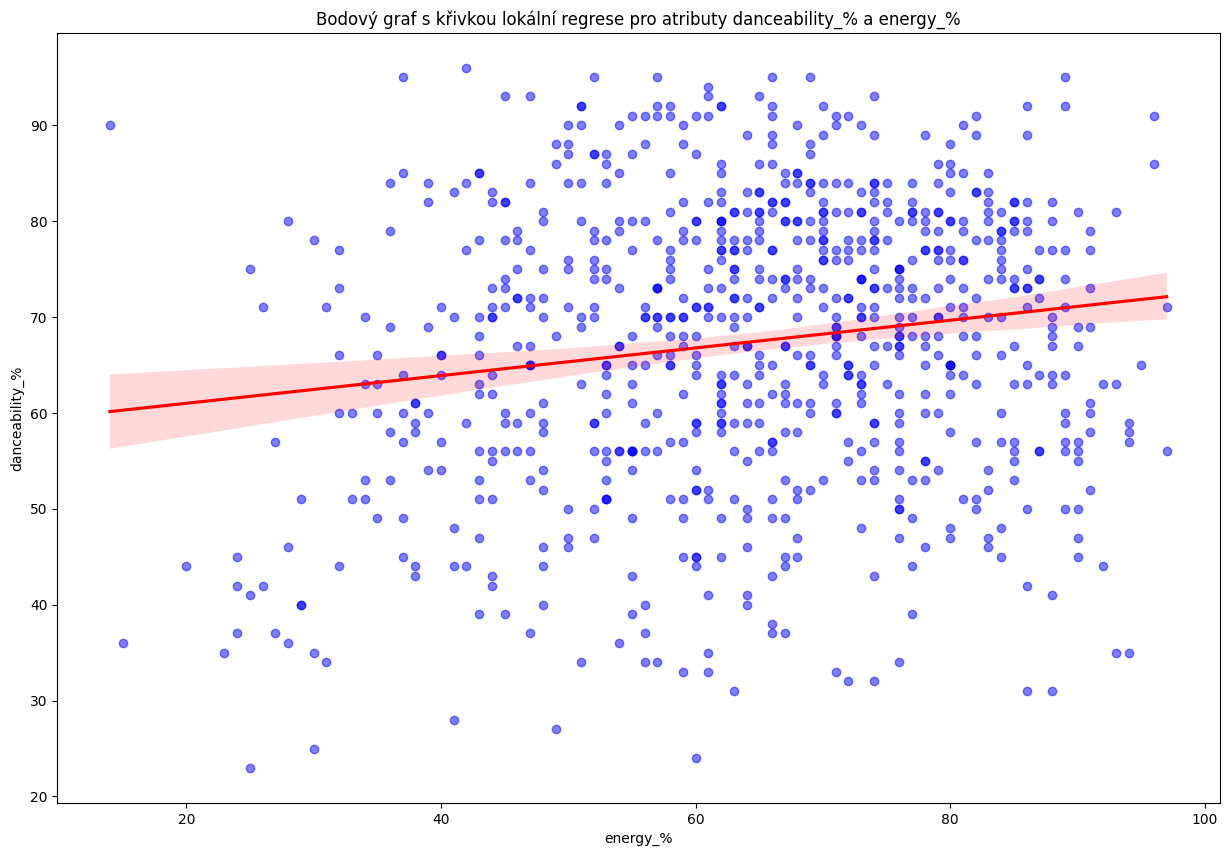

In [8]:
x_attribute = 'energy_%'
y_attribute = 'danceability_%'

plt.figure(figsize=(15, 10))
sns.regplot(x=x_attribute, y=y_attribute, data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Bodový graf s křivkou lokální regrese pro atributy danceability_% a energy_%')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.show()


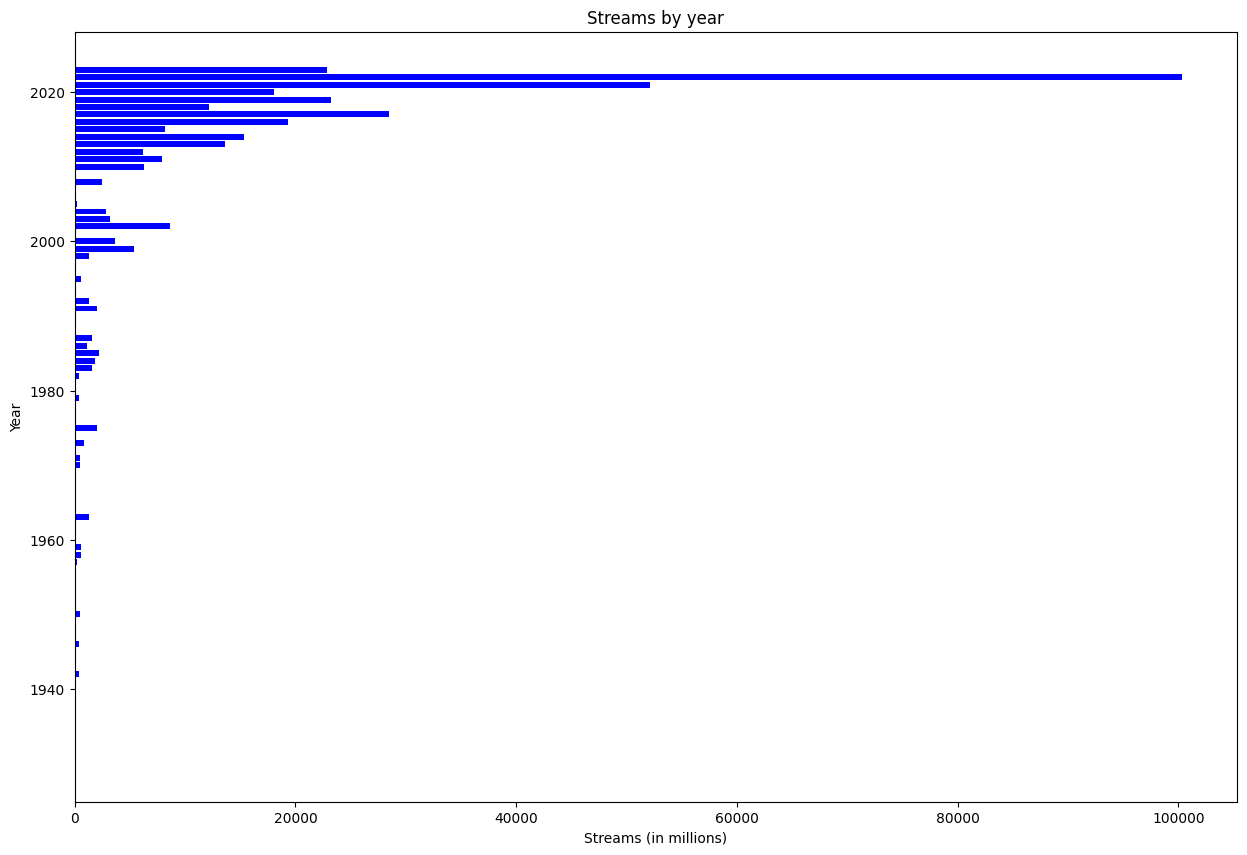

In [9]:
x = df['released_year']
y = df['streams']

df_grouped = df.groupby(['released_year'])['streams'].sum().reset_index()

plt.figure(figsize=(15, 10))
plt.barh(df_grouped['released_year'], df_grouped['streams']/10**6, color='blue', )

plt.title('Streams by year')
plt.xlabel('Streams (in millions)')
plt.ylabel('Year')
plt.ylim = ([1940, 2023])

plt.show()

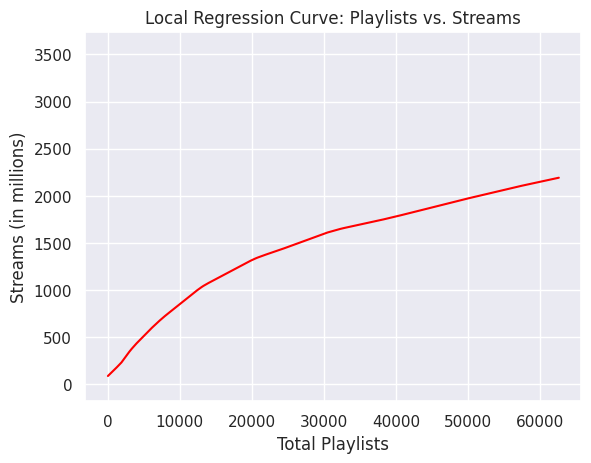

In [16]:
df['played'] = df['in_spotify_playlists'] + df['in_deezer_playlists'] + df['in_apple_playlists']

df['streams_millions'] = df['streams']/10**6

sns.set(style="darkgrid")

sns.scatterplot(x='played', y='streams_millions', data=df, alpha=0.7, marker='')

lowess = sm.nonparametric.lowess
smoothed = lowess(df['streams_millions'], df['played'])
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Local Regression')

plt.xlabel('Total Playlists')
plt.ylabel('Streams (in millions)')
plt.title('Local Regression Curve: Playlists vs. Streams')

plt.show()

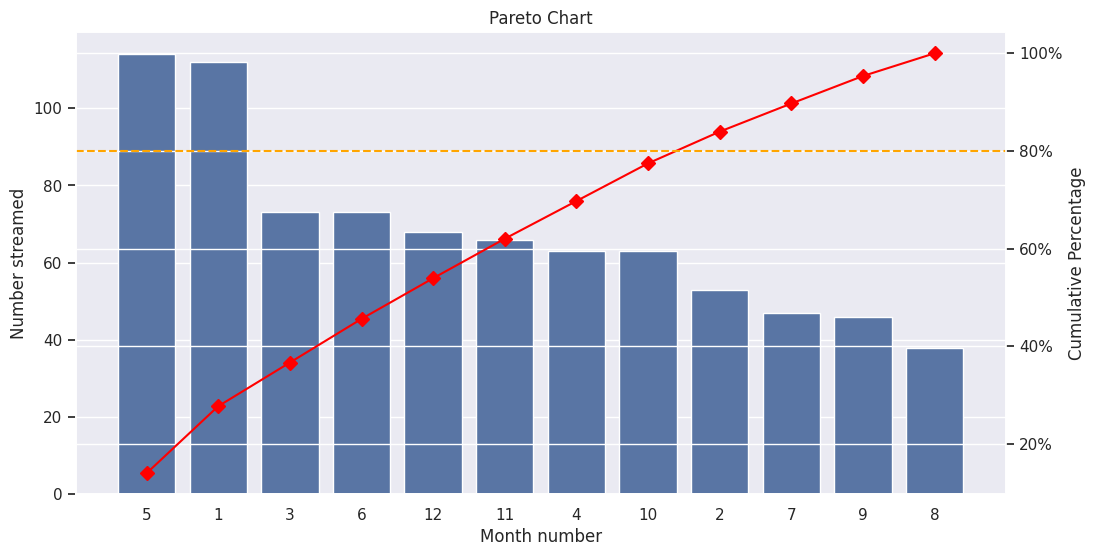

In [11]:
monthly_songs = df['released_month'].value_counts().reset_index()
monthly_songs.columns = ['released_month', 'num_songs']

monthly_songs = monthly_songs.sort_values(by='num_songs', ascending=False)

month_order = monthly_songs['released_month'].tolist()
df.loc[:, 'released_month'] = pd.Categorical(df['released_month'], categories=month_order, ordered=True)

monthly_songs = df['released_month'].value_counts().reset_index()
monthly_songs.columns = ['released_month', 'num_songs']

monthly_songs = monthly_songs.sort_values(by='released_month')

monthly_songs["cum_percentage"] = round(monthly_songs["num_songs"].cumsum()/monthly_songs["num_songs"].sum()*100,2)

fig, ax = plt.subplots(figsize=(12,6))

# Plot bars (i.e. frequencies)
sns.barplot(x='released_month', y='num_songs', data=monthly_songs)
ax.set_title("Pareto Chart")
ax.set_xlabel("Month number")
ax.set_ylabel("Number streamed")


# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(range(0,12), monthly_songs['cum_percentage'], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")

plt.show()

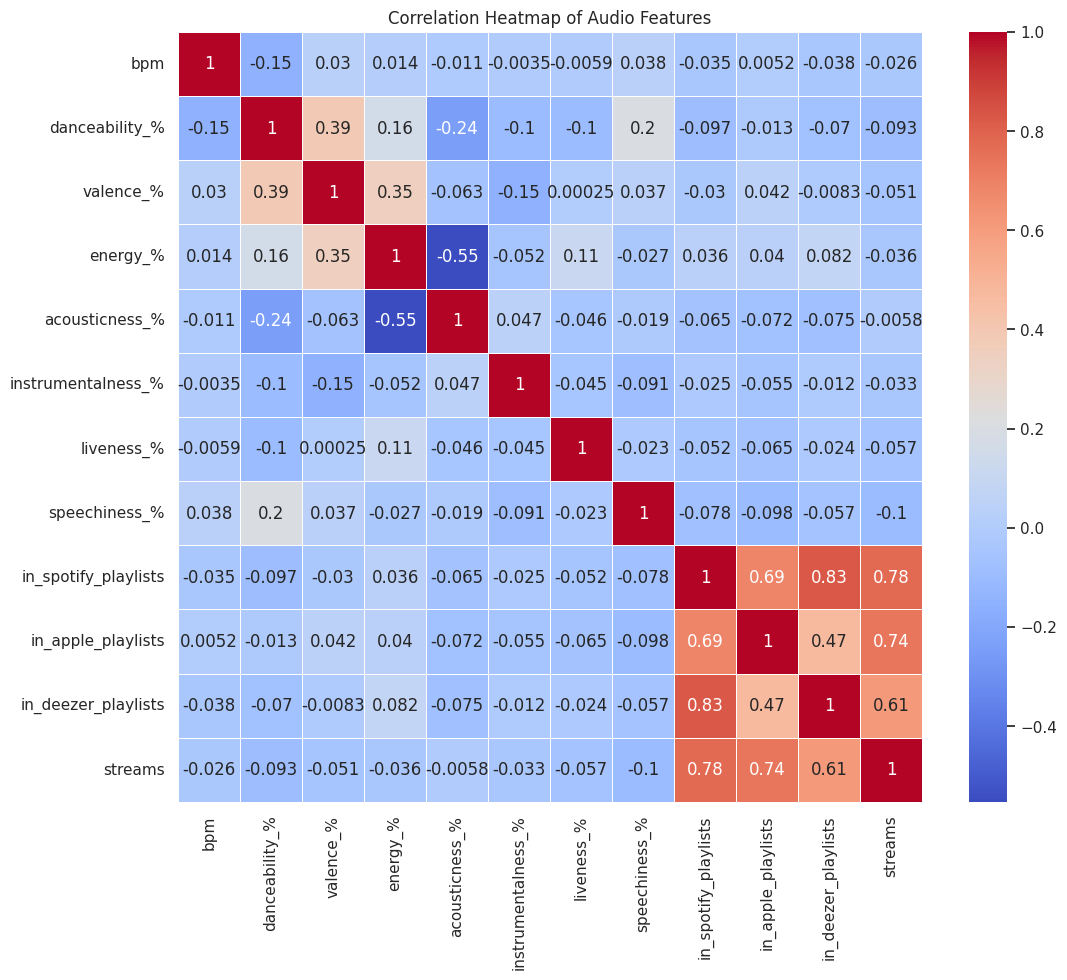

In [47]:
audio_features = df[['bpm', 'danceability_%', 'valence_%', 'energy_%',
                      'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'in_spotify_playlists','in_apple_playlists', 'in_deezer_playlists', 'streams']]

# Calculate the correlation matrix
correlation_matrix = audio_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set the title of the plot
plt.title('Correlation Heatmap of Audio Features')

# Show the plot
plt.show()

## Čištění dat

In [13]:
df.loc[:, 'streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'] = df['streams'].fillna(0)
df = df.dropna(subset=['streams'])

df

/tmp/ipykernel_28921/3939194879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streams'] = df['streams'].fillna(0)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,played,streams_graph
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,641,141
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,1580,134
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,1582,140
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,8099,801
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,3304,303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,1051,91
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,Major,42,7,24,83,1,12,6,1192,122
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,Major,80,81,67,4,0,8,6,582,74
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,Major,82,67,77,8,0,12,5,1366,134


In [14]:
new_df = df.sort_values(by="streams", ascending= False)
new_df[["track_name", "streams", "danceability_%", "bpm", "key", "mode", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]]

,track_name,streams,danceability_%,bpm,key,mode,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
179,Shape of You,3562543890,83,96,C#,Minor,93,65,58,0,9,8
41,Sunflower - Spider-Man: Into the Spider-Verse,2808096550,76,90,D,Major,91,50,54,0,7,5
162,One Dance,2713922350,77,104,C#,Major,36,63,1,0,36,5
84,STAY (with Justin Bieber),2665343922,59,170,C#,Major,48,76,4,0,10,5
140,Believer,2594040133,77,125,A#,Minor,74,78,4,0,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...
30,Rush,22581161,74,126,F,Minor,35,84,0,0,11,6
68,Overdrive,14780425,56,140,C#,Major,48,73,0,0,35,4
142,"Gol Bolinha, Gol Quadrado 2",11956641,93,133,B,Minor,68,65,42,0,12,25
393,Jhoome Jo Pathaan,1365184,82,105,G,Major,62,74,10,0,33,7
